In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

In [3]:
df

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7461190,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,4:33:20 h,NaN,FRA,NaN,M,NaN,14268.0,1151060
7461191,1995,00.00.1995,La SainteLyon 65 km (FRA),65km,2,6:05:15 h,NaN,FRA,NaN,F,NaN,10678.0,1073520
7461192,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,241.000 km,*Budapest,HUN,1950.0,M,M40,10042.0,1047373
7461193,1995,00.00.1995,Szombathely 24 hours running Race (HUN),24h,3,228.000 km,*Szeged,HUN,1959.0,M,M35,9500.0,380150


In [4]:
#cleanup data
# have USA races with >50mi in 2020


#from the data we know we're looking for 52.4mi	, 50mi
fltr = (df['Event distance/length'].isin(['50mi','50km','52.4mi'])) & (df['Year of event']==2020)
df2 = df[fltr] #convert to a new df

#get USA from event name (not from athelete country)
# df2['Event name']
fltr = df2['Event name'].str.endswith("(USA)")
df2 = df2[fltr]

#drop "(USA)" from all event names since we're working only with US events
df2['Event name'] = df2['Event name'].str.replace(r'\(USA\)$', '', regex=True)

#new athelete age formula : 2020 - DOB
df2['Athlete age'] = (2020 - df2['Athlete year of birth'])


#remove h from athelete performance
df2['Athlete performance'] = df2['Athlete performance'].str.replace(r'h', '', regex=True)


# drop certain columns that wont be needed
df2 = df2.drop (['Year of event', 'Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'] , axis = 1)
df2 = df2.dropna()
df2 = df2.reset_index(drop=True)


# fix data types
df2['Athlete age']=df2['Athlete age'].astype(int)
df2['Athlete average speed']=df2['Athlete average speed'].astype(float)
df2['Athlete performance'] = pd.to_timedelta(df2['Athlete performance'])


df2
# df2.info()

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Athlete age
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,0 days 03:17:55,M,15.158,71287,29
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:02:32,M,12.369,629508,39
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:07:57,M,12.099,64838,21
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:22:02,M,11.449,704450,37
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,0 days 04:27:34,M,11.212,810281,43
...,...,...,...,...,...,...,...,...,...
26284,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:07:48,F,7.013,816361,62
26285,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:27:22,F,6.706,326469,43
26286,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:27:24,F,6.705,372174,58
26287,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,0 days 07:38:30,F,6.543,860349,39


In [5]:
#rename columns
df2 = df2.rename (columns = {
    'Event dates': 'date',
    'Event name': 'name',
    'Event distance/length': 'length',
    'Event number of finishers': 'finishers',
    'Athlete performance': 'performance',
    'Athlete gender': 'gender',
    'Athlete average speed': 'speed',
    'Athlete ID': 'ID',
    'Athlete age': 'age'
})

#reorder columns
desired_col_order = ['name', 'date', 'length', 'finishers', 'ID', 'gender', 'age', 'speed', 'performance']
df3 = df2[desired_col_order]

In [6]:
df3

,name,date,length,finishers,ID,gender,age,speed,performance
0,West Seattle Beach Run - Winter Edition,02.02.2020,50km,20,71287,M,29,15.158,0 days 03:17:55
1,West Seattle Beach Run - Winter Edition,02.02.2020,50km,20,629508,M,39,12.369,0 days 04:02:32
2,West Seattle Beach Run - Winter Edition,02.02.2020,50km,20,64838,M,21,12.099,0 days 04:07:57
3,West Seattle Beach Run - Winter Edition,02.02.2020,50km,20,704450,M,37,11.449,0 days 04:22:02
4,West Seattle Beach Run - Winter Edition,02.02.2020,50km,20,810281,M,43,11.212,0 days 04:27:34
...,...,...,...,...,...,...,...,...,...
26284,Yankee Springs Fall Trail Run Festival,03.10.2020,50km,30,816361,F,62,7.013,0 days 07:07:48
26285,Yankee Springs Fall Trail Run Festival,03.10.2020,50km,30,326469,F,43,6.706,0 days 07:27:22
26286,Yankee Springs Fall Trail Run Festival,03.10.2020,50km,30,372174,F,58,6.705,0 days 07:27:24
26287,Yankee Springs Fall Trail Run Festival,03.10.2020,50km,30,860349,F,39,6.543,0 days 07:38:30


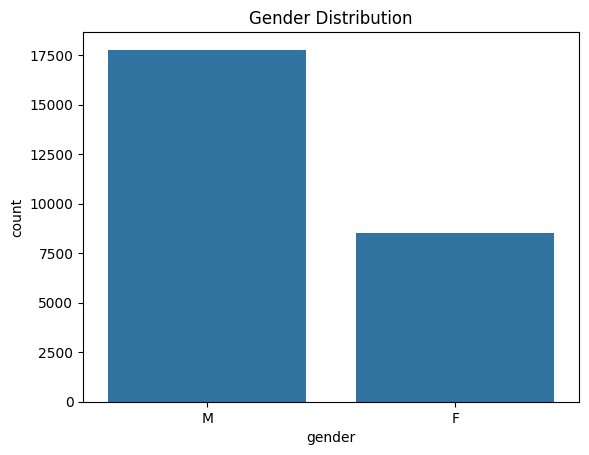

In [7]:
sns.countplot(x='gender', data=df3)
plt.title("Gender Distribution")
plt.show()

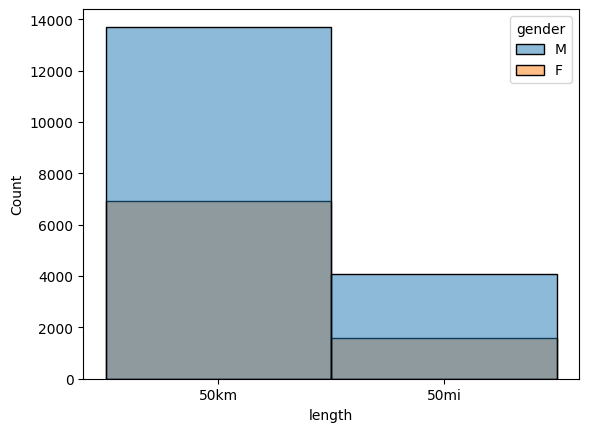

In [8]:
sns.histplot(df3 , x = 'length' , hue = 'gender')
plt.show()

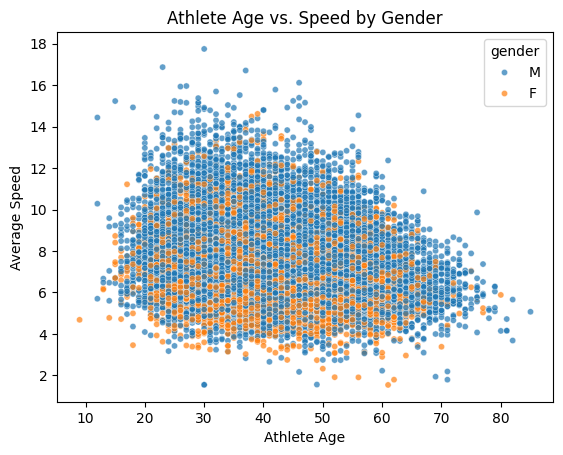

In [9]:
sns.scatterplot(data=df3, x='age', y='speed', hue='gender', alpha=0.7, s=20)
plt.xlabel("Athlete Age")
plt.ylabel("Average Speed")
plt.title("Athlete Age vs. Speed by Gender")
plt.show()

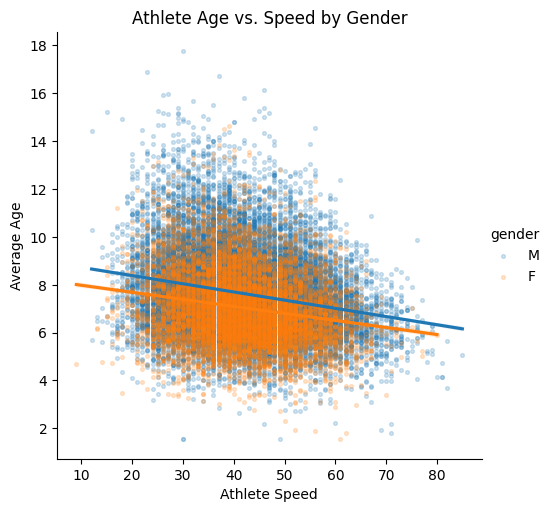

In [10]:
sns.lmplot(data=df3, x='age', y='speed', hue='gender', scatter=True, scatter_kws={'alpha':0.2, 's':7.5})
plt.xlabel("Athlete Speed")
plt.ylabel("Average Age")
plt.title("Athlete Age vs. Speed by Gender")
plt.show()

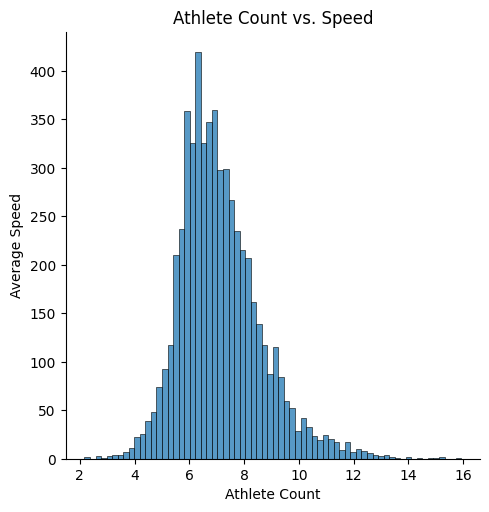

In [11]:
sns.displot(df3[df3['length']=='50mi']['speed'])
plt.xlabel("Athlete Count")
plt.ylabel("Average Speed")
plt.title("Athlete Count vs. Speed")
plt.show()

<Axes: xlabel='length', ylabel='speed'>

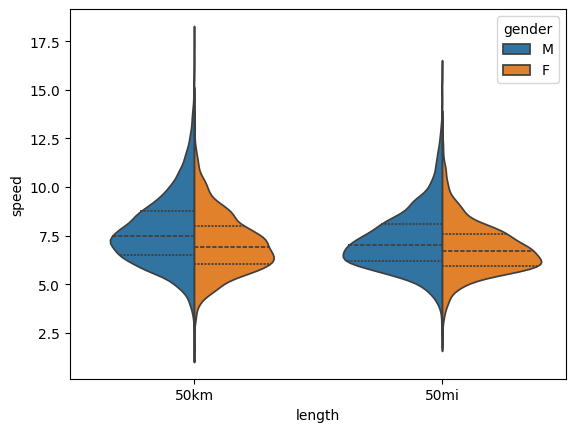

In [12]:
sns.violinplot(data=df3, x='length', y='speed', hue='gender', split=True , inner = 'quart')

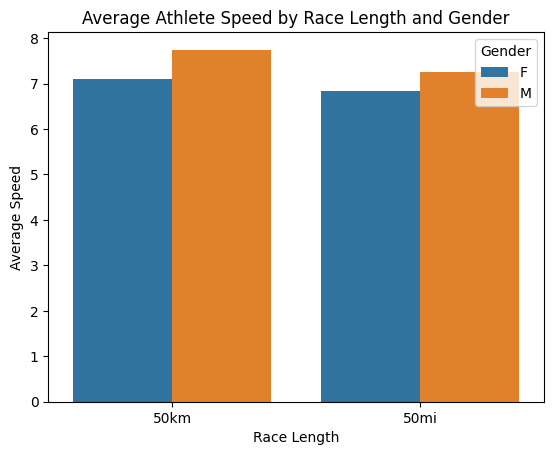

,length,gender,speed
0,50km,F,7.092015
1,50km,M,7.743376
2,50mi,F,6.830764
3,50mi,M,7.249766


In [13]:
# Compute the grouped means
grouped_df = ((df3.groupby(['length', 'gender'])['speed']).mean()).reset_index()

sns.barplot(data=grouped_df, x='length', y='speed', hue='gender')

plt.xlabel("Race Length")
plt.ylabel("Average Speed")
plt.title("Average Athlete Speed by Race Length and Gender")
plt.legend(title="Gender")

plt.show()
grouped_df

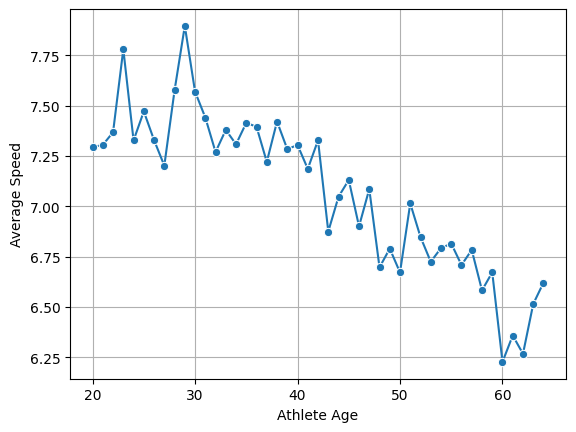

In [14]:
# Group and filter data 
data = (df3.query('length == "50mi"')).groupby('age')['speed']
data = data.agg(['mean', 'count'])
data = data.sort_values('mean', ascending=False).query('count>19')

sns.lineplot(x=data.index, y=data['mean'], marker='o')

plt.xlabel("Athlete Age")
plt.ylabel("Average Speed")
plt.grid(True)
plt.show()

In [15]:
data

,mean,count
age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [ ]:
#Seasonal Analysis

# convert date to date time format (from string)
df3['date'] = pd.to_datetime(df3['date'], format='%d.%m.%Y', errors='coerce')

# Create 'months' column 
df3['months'] = df3['date'].dt.month  
df3 = df3.dropna(subset=['months'])
df3['months'] = df3['months'].astype(int)

# df3  

#Function to assign seasons based on month
def assign_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    elif month in [12, 1, 2]:
        return "Winter"
    else:
        return None  


df3['season'] = df3['months'].apply(assign_season) # create season column
stats = df3.groupby(['season', 'gender'])['speed'] # 
stats = stats.agg(['mean', 'count']).reset_index()

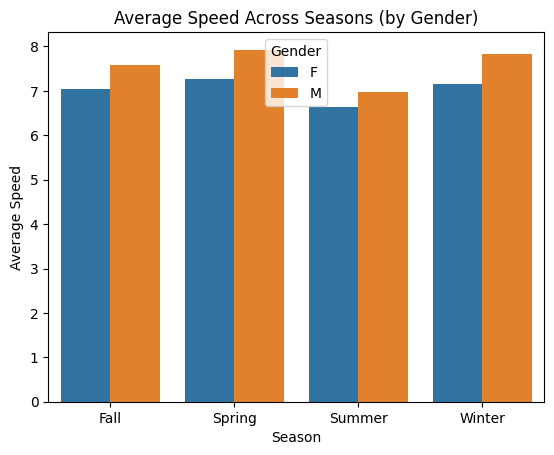

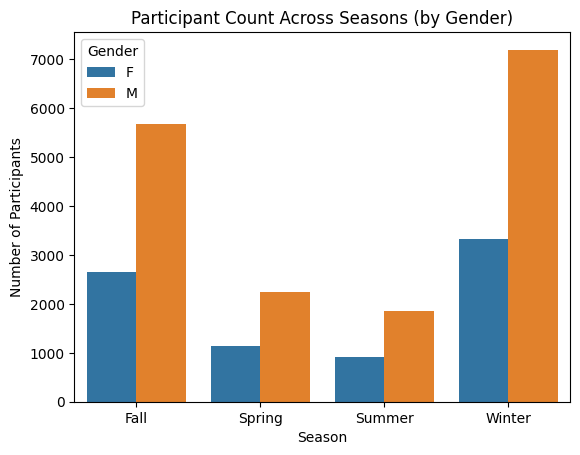

In [17]:

#  Average speed v/s seasons
sns.barplot(x='season', y='mean', hue='gender', data=stats)
plt.title("Average Speed Across Seasons (by Gender)")
plt.xlabel("Season")
plt.ylabel("Average Speed")
plt.legend(title="Gender")
plt.show()

#  count v/s seasons
sns.barplot(x='season', y='count', hue='gender', data=stats)
plt.title("Participant Count Across Seasons (by Gender)")
plt.xlabel("Season")
plt.ylabel("Number of Participants")
plt.legend(title="Gender")
plt.show()


In [18]:
 df3  

,name,date,length,finishers,ID,gender,age,speed,performance,months,season
0,West Seattle Beach Run - Winter Edition,2020-02-02,50km,20,71287,M,29,15.158,0 days 03:17:55,2,Winter
1,West Seattle Beach Run - Winter Edition,2020-02-02,50km,20,629508,M,39,12.369,0 days 04:02:32,2,Winter
2,West Seattle Beach Run - Winter Edition,2020-02-02,50km,20,64838,M,21,12.099,0 days 04:07:57,2,Winter
3,West Seattle Beach Run - Winter Edition,2020-02-02,50km,20,704450,M,37,11.449,0 days 04:22:02,2,Winter
4,West Seattle Beach Run - Winter Edition,2020-02-02,50km,20,810281,M,43,11.212,0 days 04:27:34,2,Winter
...,...,...,...,...,...,...,...,...,...,...,...
26284,Yankee Springs Fall Trail Run Festival,2020-10-03,50km,30,816361,F,62,7.013,0 days 07:07:48,10,Fall
26285,Yankee Springs Fall Trail Run Festival,2020-10-03,50km,30,326469,F,43,6.706,0 days 07:27:22,10,Fall
26286,Yankee Springs Fall Trail Run Festival,2020-10-03,50km,30,372174,F,58,6.705,0 days 07:27:24,10,Fall
26287,Yankee Springs Fall Trail Run Festival,2020-10-03,50km,30,860349,F,39,6.543,0 days 07:38:30,10,Fall
